In [2]:
import pandas as pd
import numpy as np

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-1.162180,-0.749897,0.515441,1.040512
2013-01-02,-1.790157,-0.241338,0.374318,0.354428
2013-01-03,-0.838395,-0.720495,-0.021477,-1.162410
2013-01-04,-0.708016,-1.210039,-0.723989,-0.105834
2013-01-05,0.121056,-0.578752,-1.066249,2.055940
2013-01-06,0.406334,1.018661,-0.677587,0.004151


In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [7]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-1.162180,-0.749897
2013-01-02,-1.790157,-0.241338
2013-01-03,-0.838395,-0.720495
2013-01-04,-0.708016,-1.210039
2013-01-05,0.121056,-0.578752
2013-01-06,0.406334,1.018661


In [8]:
df.loc[dates[0], "A"]

-1.1621800351968208

In [9]:
df.at[dates[0], "A"]

-1.1621800351968208

In [10]:
df.iloc[3]

A   -0.708016
B   -1.210039
C   -0.723989
D   -0.105834
Name: 2013-01-04 00:00:00, dtype: float64

In [11]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.708016,-1.210039
2013-01-05,0.121056,-0.578752


In [12]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.790157,0.374318
2013-01-03,-0.838395,-0.021477
2013-01-05,0.121056,-1.066249


In [13]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.790157,-0.241338,0.374318,0.354428
2013-01-03,-0.838395,-0.720495,-0.021477,-1.162410


In [20]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.749897,0.515441
2013-01-02,-0.241338,0.374318
2013-01-03,-0.720495,-0.021477
2013-01-04,-1.210039,-0.723989
2013-01-05,-0.578752,-1.066249
2013-01-06,1.018661,-0.677587


In [21]:
df.iloc[1, 1]

-0.24133831447045906

In [23]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,-1.162180,-0.749897,0.515441,5
2013-01-02,-1.790157,-0.241338,0.374318,5
2013-01-03,-0.838395,-0.720495,-0.021477,5
2013-01-04,-0.708016,-1.210039,-0.723989,5
2013-01-05,0.121056,-0.578752,-1.066249,5
2013-01-06,0.406334,1.018661,-0.677587,5


In [24]:
# finding missing values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,E
2013-01-01,-1.162180,-0.749897,0.515441,5,1.0
2013-01-02,-1.790157,-0.241338,0.374318,5,1.0
2013-01-03,-0.838395,-0.720495,-0.021477,5,NaN
2013-01-04,-0.708016,-1.210039,-0.723989,5,NaN


In [25]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-1.162180,-0.749897,0.515441,5,1.0
2013-01-02,-1.790157,-0.241338,0.374318,5,1.0


In [26]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-1.162180,-0.749897,0.515441,5,1.0
2013-01-02,-1.790157,-0.241338,0.374318,5,1.0
2013-01-03,-0.838395,-0.720495,-0.021477,5,5.0
2013-01-04,-0.708016,-1.210039,-0.723989,5,5.0


In [27]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [28]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
-1.790157,0.374318,5
-1.162180,0.515441,5
-0.838395,-0.021477,5
-0.708016,-0.723989,5
0.121056,-1.066249,5
0.406334,-0.677587,5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

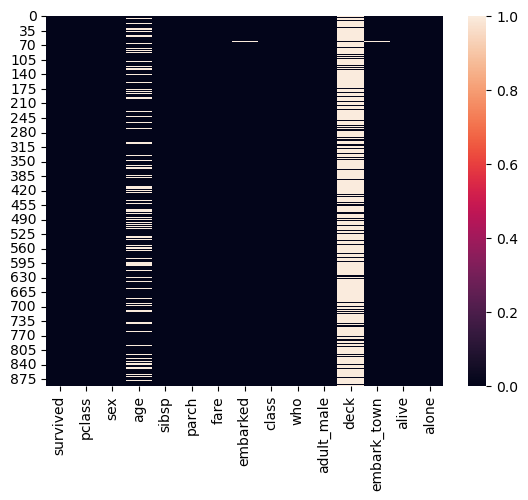

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df['sex'].nunique()

2

In [10]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [12]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

# Groupby in pandas

In [13]:
df.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [14]:
df.groupby(['survived','who']).size()

survived  who  
0         child     34
          man      449
          woman     66
1         child     49
          man       88
          woman    205
dtype: int64

In [18]:
# correlation matrix
correlation = df[['fare','age','sibsp','parch']].corr()
correlation

,fare,age,sibsp,parch
fare,1.000000,0.096067,0.159651,0.216225
age,0.096067,1.000000,-0.308247,-0.189119
sibsp,0.159651,-0.308247,1.000000,0.414838
parch,0.216225,-0.189119,0.414838,1.000000


<Axes: >

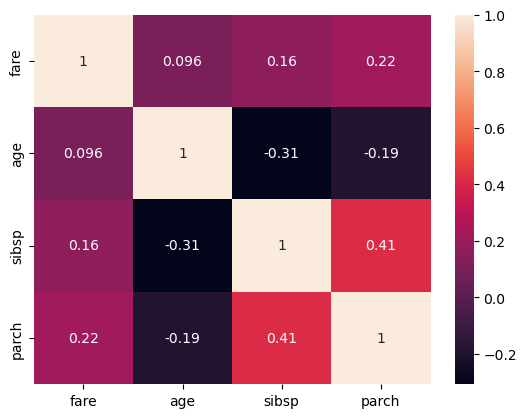

In [20]:
sns.heatmap(correlation,annot=True)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


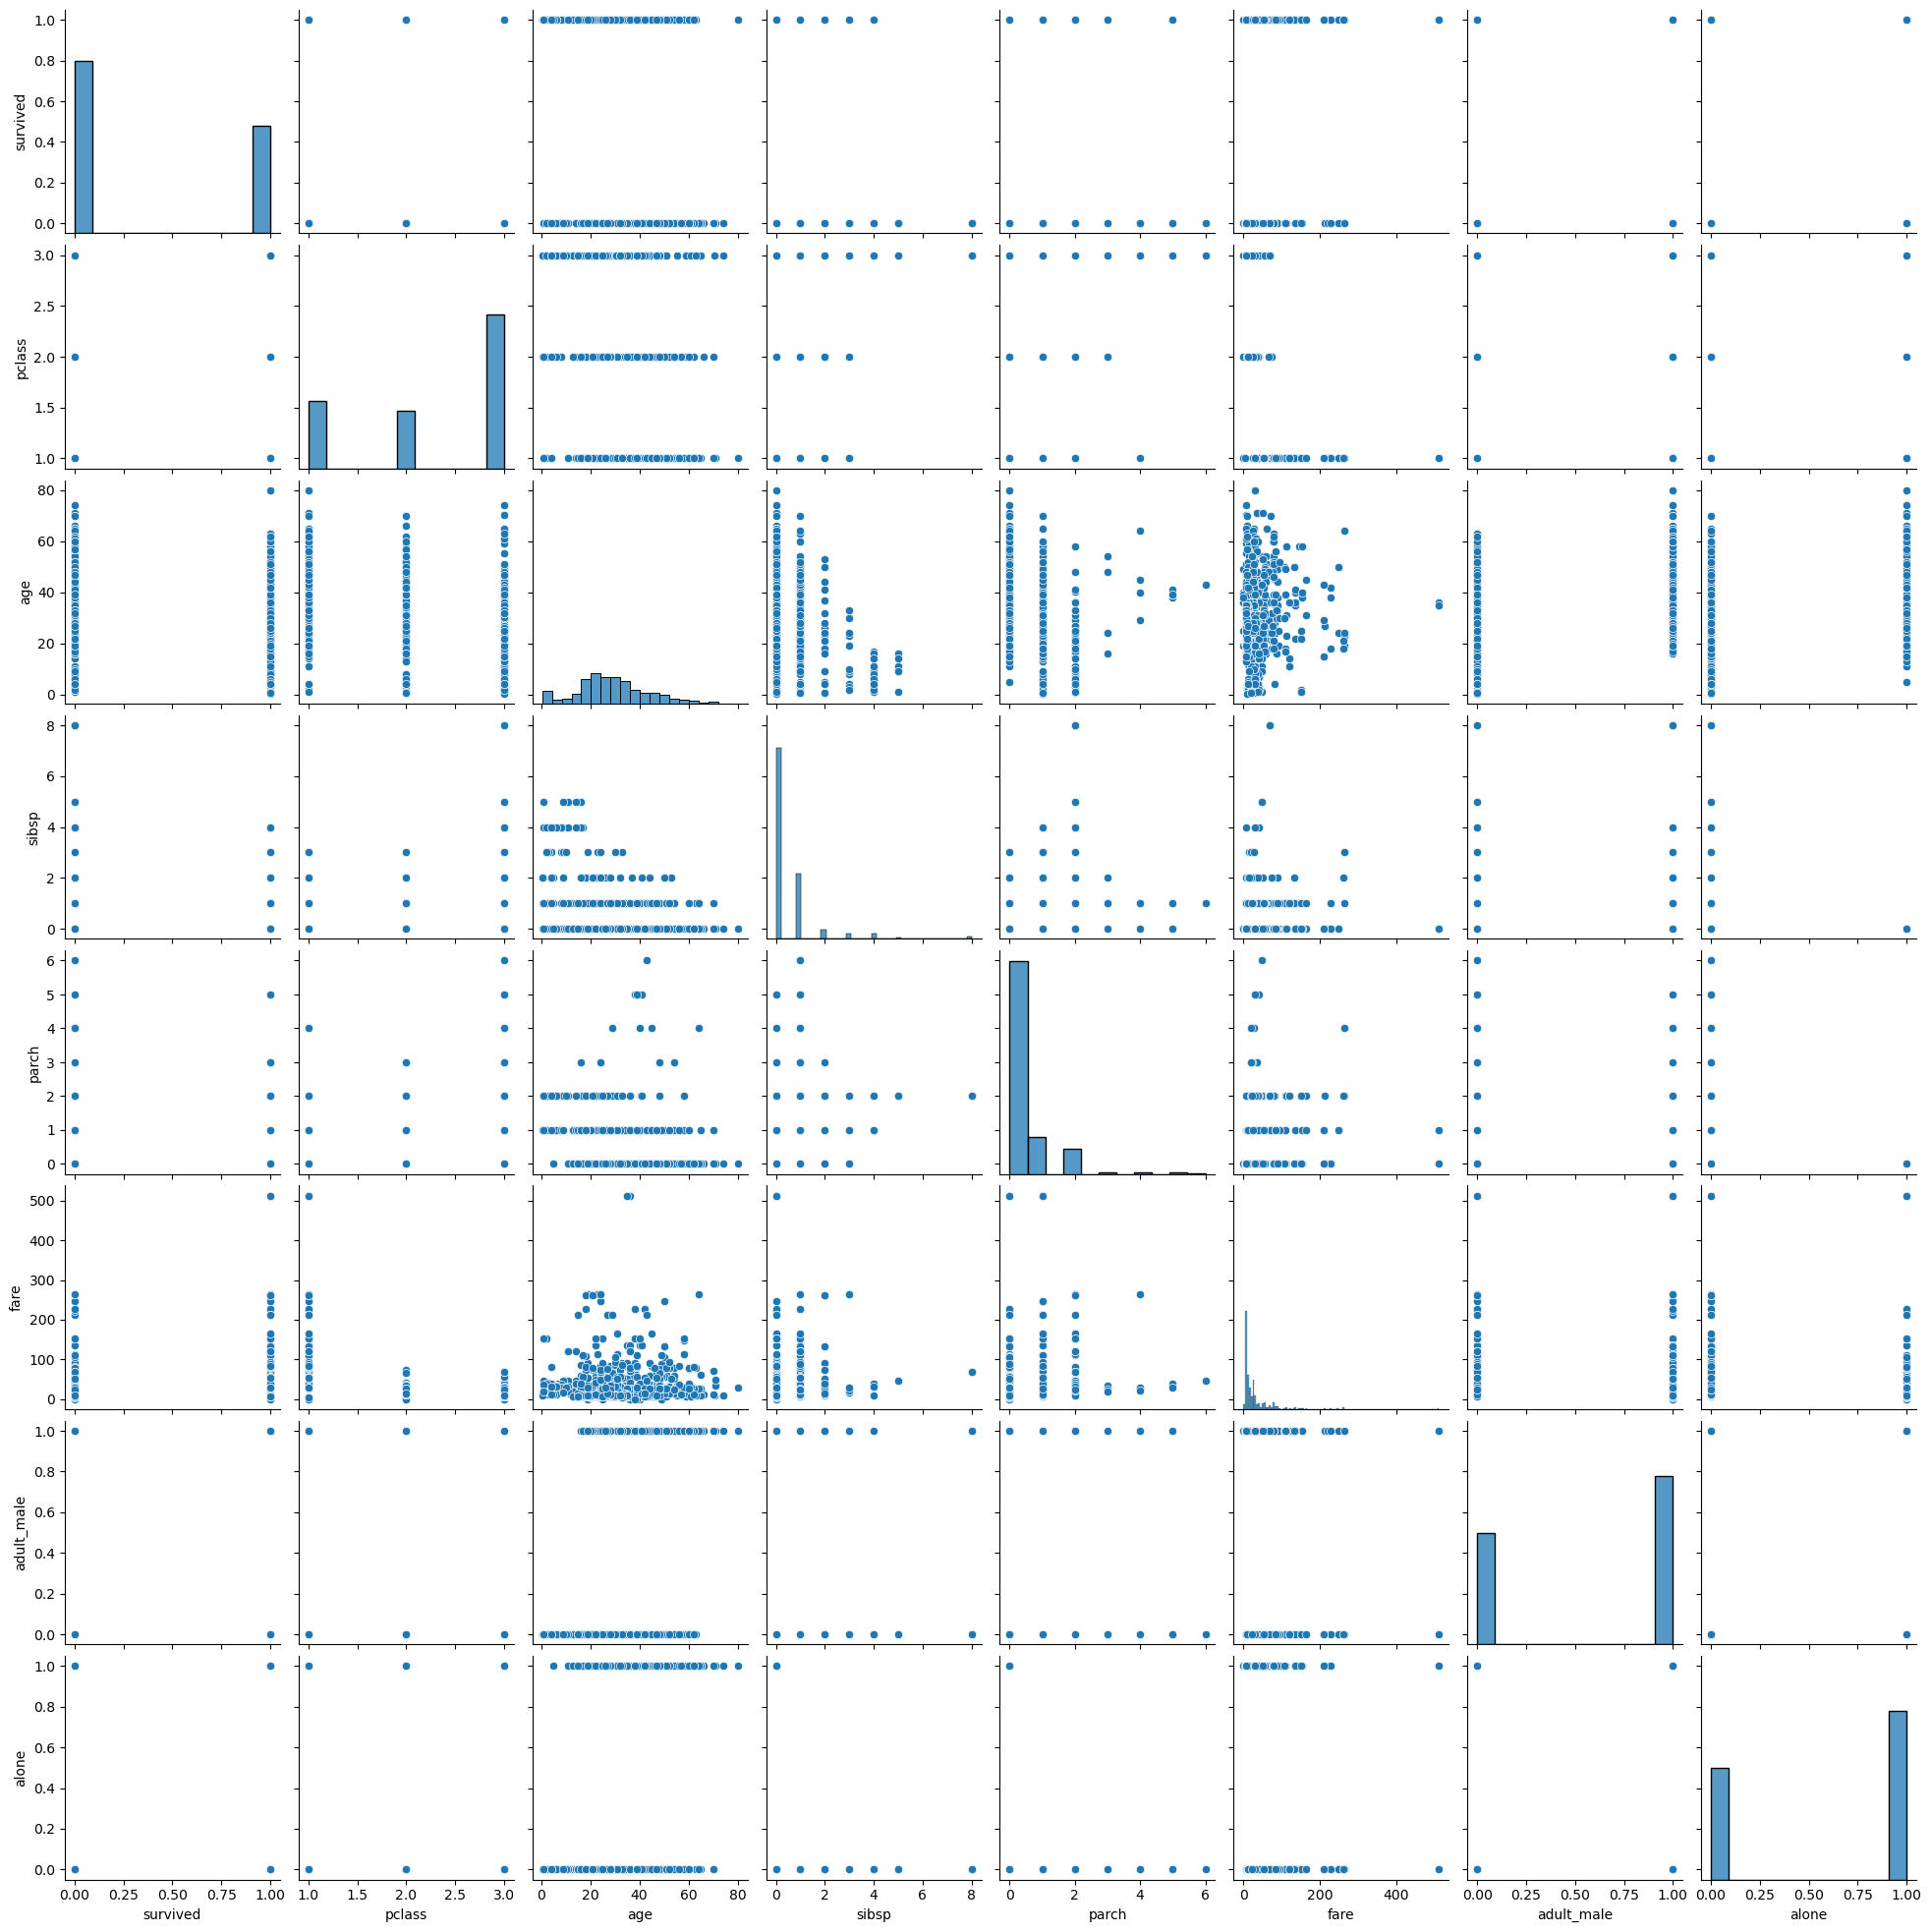

In [21]:
sns.pairplot(df)

# drop null value techniques

In [22]:
df.drop('deck',axis=1, inplace=True)

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [24]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [26]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [27]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [28]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

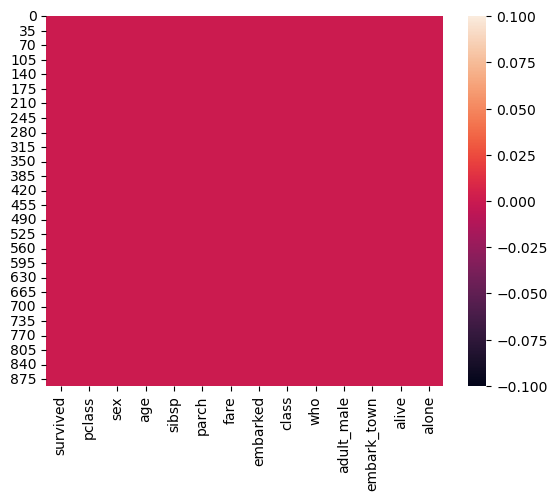

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.age.min()

0.42

In [32]:
df.age.max()

80.0

<Axes: xlabel='age', ylabel='Count'>

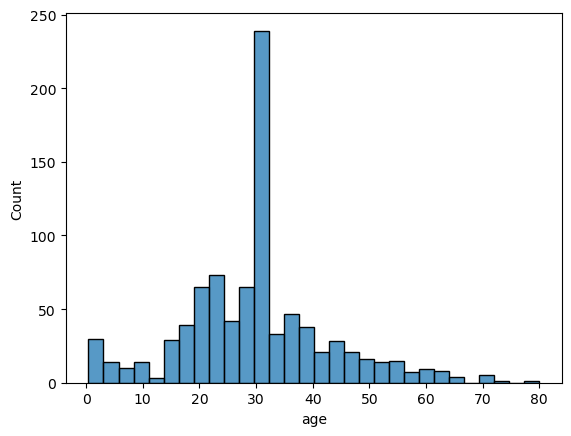

In [36]:
sns.histplot(df['age'])

In [38]:
bins = [0,1,5,12,18,30,50,80]
labels = ['Infants','Toddlers','Kids','Teens','Youngs','Middle Aged','Old']

pd.cut(df['age'], bins=bins, labels=labels)

0           Youngs
1      Middle Aged
2           Youngs
3      Middle Aged
4      Middle Aged
          ...     
886         Youngs
887         Youngs
888         Youngs
889         Youngs
890    Middle Aged
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infants' < 'Toddlers' < 'Kids' < 'Teens' < 'Youngs' < 'Middle Aged' < 'Old']

# Feature Engineering

In [39]:
bins = [0,1,5,12,18,30,50,80]
labels = ['Infants','Toddlers','Kids','Teens','Youngs','Middle Aged','Old']

df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [41]:
df['binned_age'].value_counts()

Youngs         447
Middle Aged    241
Teens           70
Old             64
Toddlers        30
Kids            25
Infants         14
Name: binned_age, dtype: int64

# Renaming coloumn name

In [42]:
df.rename(columns={'binned_age': 'age_groups'}, inplace = True)

In [43]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [44]:
  df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_groups'],
      dtype='object')

In [45]:
df_1 = df[['survived','age_groups','fare','class']]

In [47]:
df_1.head()

,survived,age_groups,fare,class
0,0,Youngs,7.2500,Third
1,1,Middle Aged,71.2833,First
2,1,Youngs,7.9250,Third
3,1,Middle Aged,53.1000,First
4,0,Middle Aged,8.0500,Third


In [50]:
df_1['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [51]:
df_1[df_1['class'] == 'First']

,survived,age_groups,fare,class
1,1,Middle Aged,71.2833,First
3,1,Middle Aged,53.1000,First
6,0,Old,51.8625,First
11,1,Old,26.5500,First
23,1,Youngs,35.5000,First
...,...,...,...,...
871,1,Middle Aged,52.5542,First
872,0,Middle Aged,5.0000,First
879,1,Old,83.1583,First
887,1,Youngs,30.0000,First


In [52]:
df_1[df_1['fare'] > 200]

,survived,age_groups,fare,class
27,0,Youngs,263.0000,First
88,1,Youngs,263.0000,First
118,0,Youngs,247.5208,First
258,1,Middle Aged,512.3292,First
299,1,Middle Aged,247.5208,First
311,1,Teens,262.3750,First
341,1,Youngs,263.0000,First
377,0,Youngs,211.5000,First
380,1,Middle Aged,227.5250,First
438,0,Old,263.0000,First


In [55]:
df_1[(df_1['fare'] > 70) & (df_1['class'] == 'First')]

,survived,age_groups,fare,class
1,1,Middle Aged,71.2833,First
27,0,Youngs,263.0000,First
31,1,Youngs,146.5208,First
34,0,Youngs,82.1708,First
52,1,Middle Aged,76.7292,First
...,...,...,...,...
829,1,Old,80.0000,First
835,1,Middle Aged,83.1583,First
849,1,Youngs,89.1042,First
856,1,Middle Aged,164.8667,First


# Pakistan Population Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('population_pakistan.csv')
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROVINCE                    528 non-null    object 
 1   DIVISION                    528 non-null    object 
 2   DISTRICT                    528 non-null    object 
 3   SUB DIVISION                528 non-null    object 
 4   AREA (sq.km)                528 non-null    float64
 5   ALL SEXES (RURAL)           528 non-null    int64  
 6   MALE (RURAL)                528 non-null    int64  
 7   FEMALE (RURAL)              528 non-null    int64  
 8   TRANSGENDER (RURAL)         528 non-null    int64  
 9   SEX RATIO (RURAL)           528 non-null    float64
 10  AVG HOUSEHOLD SIZE (RURAL)  528 non-null    float64
 11  POPULATION 1998 (RURAL)     528 non-null    int64  
 12  ANNUAL GROWTH RATE (RURAL)  528 non-null    float64
 13  ALL SEXES (URBAN)           528 non

In [4]:
df.dtypes

PROVINCE                       object
DIVISION                       object
DISTRICT                       object
SUB DIVISION                   object
AREA (sq.km)                  float64
ALL SEXES (RURAL)               int64
MALE (RURAL)                    int64
FEMALE (RURAL)                  int64
TRANSGENDER (RURAL)             int64
SEX RATIO (RURAL)             float64
AVG HOUSEHOLD SIZE (RURAL)    float64
POPULATION 1998 (RURAL)         int64
ANNUAL GROWTH RATE (RURAL)    float64
ALL SEXES (URBAN)               int64
MALE (URBAN)                    int64
FEMALE (URBAN)                  int64
TRANSGENDER (URBAN)             int64
SEX RATIO (URBAN)             float64
AVG HOUSEHOLD SIZE (URBAN)    float64
POPULATION 1998 (URBAN)         int64
ANNUAL GROWTH RATE (URBAN)    float64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA (sq.km),528.0,1492.005871,2039.453778,0.0,425.000,882.000,1734.2500,18374.00
ALL SEXES (RURAL),528.0,246278.011364,271189.816559,0.0,50934.500,165241.000,312911.2500,2297375.00
MALE (RURAL),528.0,125275.687500,137563.021458,0.0,27127.250,84134.500,160502.2500,1172995.00
FEMALE (RURAL),528.0,120984.149621,133716.898296,0.0,23979.000,82044.000,152219.0000,1124167.00
TRANSGENDER (RURAL),528.0,18.174242,25.522248,0.0,1.000,10.000,25.0000,213.00
SEX RATIO (RURAL),528.0,98.982614,26.812660,0.0,101.105,105.285,108.3475,139.38
AVG HOUSEHOLD SIZE (RURAL),528.0,6.277064,2.074947,0.0,5.700,6.310,7.2000,12.43
POPULATION 1998 (RURAL),528.0,167427.994318,178388.976993,0.0,35273.500,117206.500,213054.2500,1044035.00
ANNUAL GROWTH RATE (RURAL),528.0,3.124792,9.577872,0.0,1.440,2.030,2.8125,100.00
ALL SEXES (URBAN),528.0,140863.528409,351246.279136,0.0,0.000,43254.500,117814.7500,3653616.00


In [6]:
df.isnull().sum()

PROVINCE                      0
DIVISION                      0
DISTRICT                      0
SUB DIVISION                  0
AREA (sq.km)                  0
ALL SEXES (RURAL)             0
MALE (RURAL)                  0
FEMALE (RURAL)                0
TRANSGENDER (RURAL)           0
SEX RATIO (RURAL)             0
AVG HOUSEHOLD SIZE (RURAL)    0
POPULATION 1998 (RURAL)       0
ANNUAL GROWTH RATE (RURAL)    0
ALL SEXES (URBAN)             0
MALE (URBAN)                  0
FEMALE (URBAN)                0
TRANSGENDER (URBAN)           0
SEX RATIO (URBAN)             0
AVG HOUSEHOLD SIZE (URBAN)    0
POPULATION 1998 (URBAN)       0
ANNUAL GROWTH RATE (URBAN)    0
dtype: int64

<Axes: ylabel='AREA (sq.km)'>

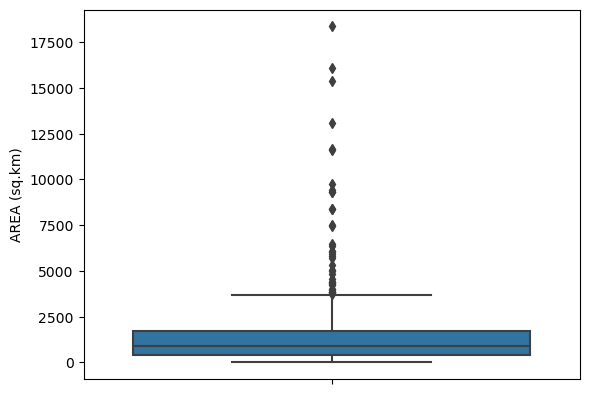

In [8]:
# box plot
sns.boxplot(df, y='AREA (sq.km)')

<Axes: xlabel='AREA (sq.km)', ylabel='Count'>

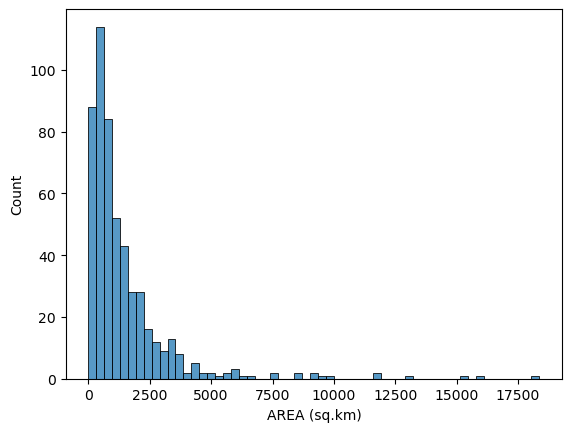

In [10]:
sns.histplot(df, x='AREA (sq.km)')

<Axes: xlabel='DIVISION', ylabel='ALL SEXES (RURAL)'>

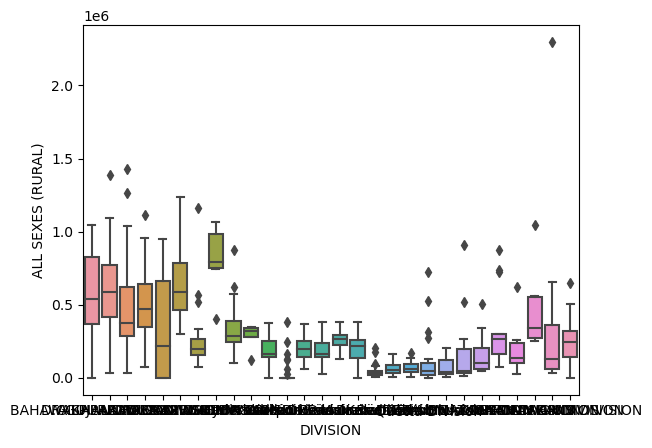

In [15]:
sns.boxplot(df, x='DIVISION', y='ALL SEXES (RURAL)')

In [17]:
df.groupby(['DIVISION']).size().sort_values()

DIVISION
Badin Division                   5
MARDAN DIVISION                  7
SAHIWAL DIVISION                 7
KOHAT DIVISION                  14
MULTAN DIVISION                 14
D.G.KHAN DIVISION               14
HAZARA DIVISION                 15
BAHAWALPUR DIVISION             15
DERA ISMAIL KHAN DIVISION       15
BANNU DIVISION                  15
Shaheed Benazirabad Division    15
SARGODHA DIVISION               17
FAISALABAD DIVISION             17
LAHORE DIVISION                 17
Kalat Division                  18
Sukkur Division                 18
PESHAWAR DIVISION               18
Mirpurkhas Division             18
Naseerabad Division             19
Zhob Division                   19
GUJRANWALA DIVISION             20
Larkana Division                21
RAWALPINDI DIVISION             22
Karachi Division                30
Hyderabad Division              30
MALAKAND DIVISION               33
Makran Division                 37
Quetta Division                 38
dtype: int6

In [21]:
result = df.groupby(['PROVINCE','DIVISION','DISTRICT','SUB DIVISION'])['ALL SEXES (RURAL)'].mean()
result

PROVINCE     DIVISION         DISTRICT         SUB DIVISION      
BALOCHISTAN  Kalat Division   KALAT DISTRICT   GAZG SUB-TEHSIL         5721.0
                                               JOHAN SUB-TEHSIL       10708.0
                                               KALAT TEHSIL           92298.0
                                               MANGOCHAR TEHSIL       65678.0
                                               SURAB TEHSIL          165260.0
                                                                       ...   
SINDH        Sukkur Division  SUKKUR DISTRICT  NEW SUKKUR TALUKA      43652.0
                                               PANO AQIL TALUKA      336263.0
                                               ROHRI TALUKA          284840.0
                                               SALEHPAT TALUKA       102811.0
                                               SUKKUR CITY TALUKA         0.0
Name: ALL SEXES (RURAL), Length: 528, dtype: float64

# EDA with ydata profiling

In [4]:
import ydata_profiling as yd
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('population_pakistan.csv')
df

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SARAROGHA TEHSIL,813.0,98180,51479,46694,7,110.25,...,72063,1.64,0,0,0,0,0.00,0.00,0,0.00
524,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SERWEKAI TEHSIL,398.0,54540,28695,25844,1,111.03,...,31472,2.93,0,0,0,0,0.00,0.00,0,0.00
525,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TIARZA TEHSIL,734.0,45156,23649,21507,0,109.96,...,37708,0.95,0,0,0,0,0.00,0.00,0,0.00
526,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TOI KHULLA TEHSIL,567.0,50413,27462,22947,4,119.68,...,36508,1.71,0,0,0,0,0.00,0.00,0,0.00


In [9]:
profile = yd.ProfileReport(df)
profile.to_file(output_file='pak_population.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# How to do skimming of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from skimpy import skim

ModuleNotFoundError: No module named 'skimpy'

# EDA With Google Play Store Dataset

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('googleplaystore.csv')
# pd.set_option('display.max_columns', None)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Important things to know

In [5]:
# print maximum rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.5M                    68
2.3M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
40M                     62
3.9M                   

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
print(f"The number of rows are {df.shape[0]}, and columns are {df.shape[1]}")

The number of rows are 10841, and columns are 13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Convert Whole size column inot byte 

In [12]:
df['Size'].isnull().sum()

0

In [13]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [14]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [15]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [16]:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', ""))*1024
        elif 'M' in size:
            return float(size.replace('M', ""))*1024*1024
        elif 'Varies with device' in size:
            return np.nan
    return size
    

In [17]:
df['Size'] = df['Size'].apply(convert_size)

In [18]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.rename(columns={'Size': "Size_in_bytes"}, inplace = True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [23]:
df['Size_in_Kb'] = df['Size_in_bytes'].apply(lambda x: x/(1024))

In [24]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


# Lets take care of Installs

In [25]:
df['Installs'].uniqueue()

AttributeError: 'Series' object has no attribute 'uniqueue'

In [ ]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [26]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',"") if '+' in str(x) else x)

In [27]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',"") if ',' in str(x) else x)

In [28]:
df = df.loc[~df['Installs'].str.contains('Free')]

# Reset the index if needed
df = df.reset_index(drop=True)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [29]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

# Price Column

In [30]:
df['Price'].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [31]:
# Remove $ sign from that column
df['Price'] = df['Price'].apply(lambda x: x.replace('$',"") if '$' in str(x) else x)

In [32]:
df['Price'].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [33]:
df['Price'] = df['Price'].apply(lambda x: float(x))

In [34]:
df.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_Kb
count,9366.000000,9.145000e+03,1.084000e+04,10840.000000,9145.000000,9145.000000
mean,4.191757,2.256133e+07,1.546434e+07,1.027368,21.516165,22032.553406
std,0.515219,2.368637e+07,8.502936e+07,15.949703,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [48]:
# using f string print min, max and average prices of the app
print(f"The minimum price is {df['Price'].min()} $")
print(f"The maximum price is {df['Price'].max()} $")
print(f"The average price is {df['Price'].mean()} $")

The minimum price is 0.0 $
The maximum price is 400.0 $
The average price is 1.027368081180812 $


In [37]:
# missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_Mb        1695
Size_in_Kb        1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [38]:
# Give prcentage of the missing values in the dataset
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Size_in_bytes     15.636531
Size_in_Mb        15.636531
Size_in_Kb        15.636531
Rating            13.597786
Current Ver        0.073801
Android Ver        0.018450
Type               0.009225
App                0.000000
Category           0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

In [40]:
df.isnull().sum().sum()

6570

<Axes: >

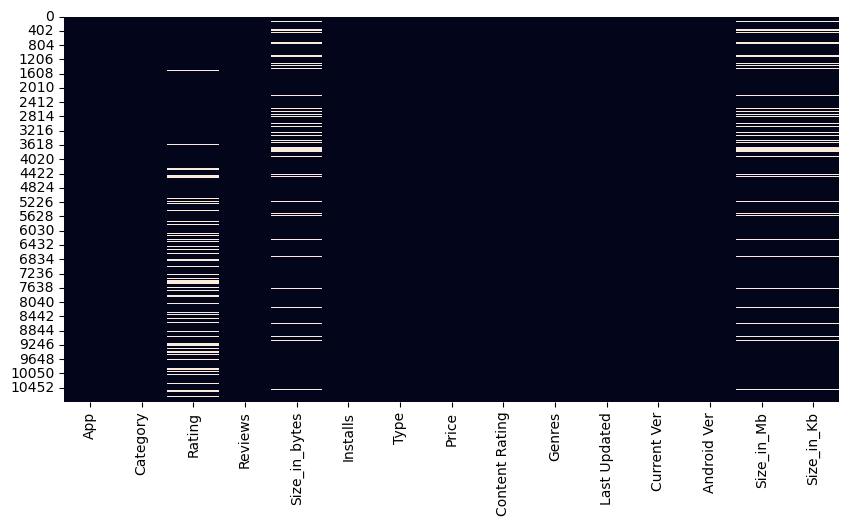

In [47]:
# plot missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

In [51]:
df.duplicated().sum() 

483

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape[0]

10357

In [54]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

In [55]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)


Category
PARENTING              8617941763614343114133936378967107559497632484...
SOCIAL                 7815830666577313860625949173295532622492170147...
MAPS_AND_NAVIGATION    7232629156815348110480050459432695644349284201...
EDUCATION              6289924181893254485375314299776977032346407510...
COMMUNICATION          5664284769119316125257964299514290354604324341...
ENTERTAINMENT          5456208116562894829677147008910939985095241225...
SPORTS                 5211381802283662828824597951338259119951733342...
FAMILY                 4706944214544499101477412753339832026757611161...
GAME                   4447388277222642242667725425814889736920352341...
HEALTH_AND_FITNESS     4281561577380983113927233722012540059220098117...
Name: Reviews, dtype: object

In [56]:
# groupby category with rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
EDUCATION              4.375969
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333871
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

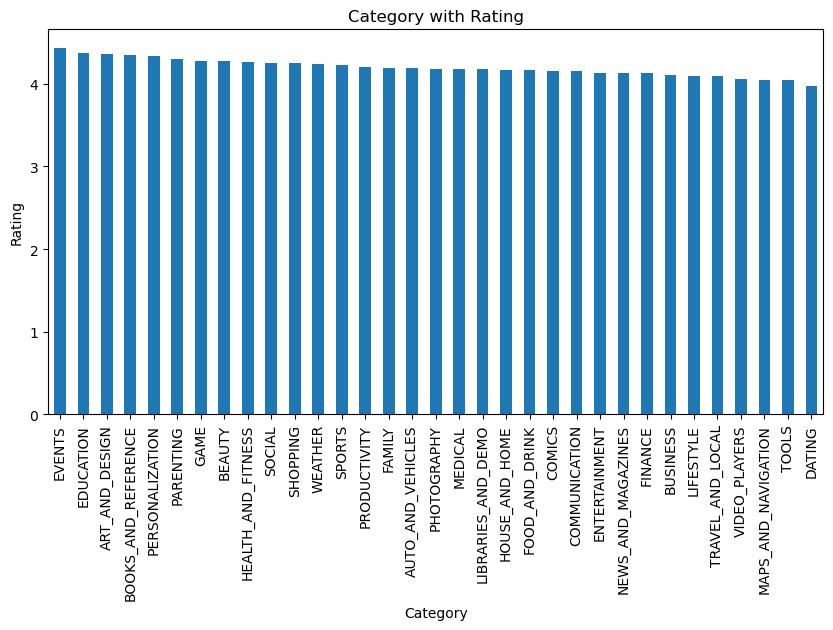

In [57]:
# plot a graph with category with Rating
plt.figure(figsize=(10,5))
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Rating')
plt.title('Category with Rating')
plt.show()